In [1]:
!pip install fastai --upgrade


!pip install -Uqq waterfallcharts treeinterpreter dtreeviz

from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import *
from sklearn.tree import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8


from google.colab import drive
drive.mount('/content/drive')

     |████████████████████████████████| 189 kB 7.0 MB/s 
     |████████████████████████████████| 56 kB 2.8 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
     |████████████████████████████████| 62 kB 721 kB/s 
Mounted at /content/drive


In [2]:
trainPath = Path('/content/drive/MyDrive/guild')
df = pd.read_csv(trainPath /'TrainingData.csv')
splits = RandomSplitter(valid_pct=0.1, seed=42)(range_of(df))
to = TabularPandas(df, procs=[Categorify, FillMissing,Normalize],
                   cat_names = ['Brewery', 'Country', 'Chooser', 'Style'],
                   cont_names = ['ABV'],
                   y_names='Score_Band',
                   splits=splits)

In [3]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y
m = DecisionTreeRegressor(max_leaf_nodes=6)
m.fit(xs, y)

DecisionTreeRegressor(max_leaf_nodes=6)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


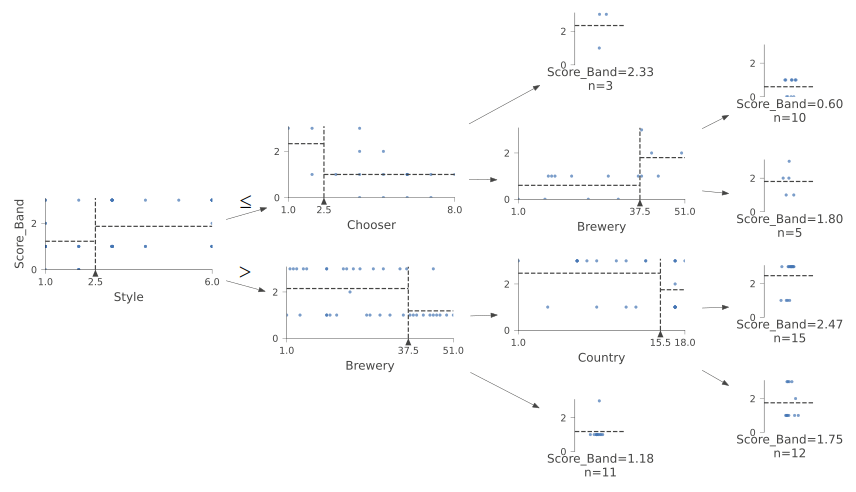

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from fastai.imports import *
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

xs.columns

samp_idx = np.random.permutation(len(y))[:500]
dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, "Score_Band",
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        orientation='LR')